In [2]:
# Import Librarias
import pandas as pd
import numpy as np

# Import Libraries to Plot
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
sales = pd.read_csv("/home/miguel/proyectos/ds_associate/DS_Associate_DataCamp/Intro_Stats/data/beauty_sales_summary.csv")

In [4]:
# Explore The Data

display(sales.head(10))
print(sales.shape)
print(sales.info())

,product_id,product_name,category,units_sold,unit_price,revenue,month,channel,region
0,P1000,Producto_0,Makeup,453,15.70,7112.10,2023-01-01,Retail,Chile
1,P1000,Producto_0,Makeup,1662,30.04,49926.48,2023-02-01,Online,Chile
2,P1000,Producto_0,Makeup,429,16.39,7031.31,2023-03-01,Retail,Colombia
3,P1000,Producto_0,Makeup,286,36.57,10459.02,2023-04-01,Online,Perú
4,P1000,Producto_0,Makeup,439,26.49,11629.11,2023-05-01,Online,Colombia
5,P1000,Producto_0,Makeup,470,24.42,11477.40,2023-06-01,Retail,México
6,P1000,Producto_0,Makeup,777,48.72,37855.44,2023-07-01,Distributor,México
7,P1000,Producto_0,Makeup,619,38.55,23862.45,2023-08-01,Retail,Chile
8,P1000,Producto_0,Makeup,488,19.40,9467.20,2023-09-01,Online,Chile
9,P1000,Producto_0,Makeup,469,19.59,9187.71,2023-10-01,Online,Perú


(480, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    480 non-null    object 
 1   product_name  480 non-null    object 
 2   category      480 non-null    object 
 3   units_sold    480 non-null    int64  
 4   unit_price    480 non-null    float64
 5   revenue       480 non-null    float64
 6   month         480 non-null    object 
 7   channel       480 non-null    object 
 8   region        480 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 33.9+ KB
None


In [5]:
sales.describe()

,units_sold,unit_price,revenue
count,480.000000,480.000000,480.000000
mean,457.847917,28.009083,12899.991521
std,273.355481,13.062339,10678.141693
min,0.000000,1.270000,0.000000
25%,302.000000,16.997500,5850.600000
50%,458.500000,28.155000,10360.825000
75%,554.000000,39.015000,17530.515000
max,2223.000000,49.930000,90712.440000


In [6]:
# The Feature 'category' to catogory type
sales['category'] = sales['category'].astype('category')


In [7]:
# Convert 'month' column to datetime format
sales['month'] = pd.to_datetime(sales['month'])

In [8]:
sales['category'].unique()

['Makeup', 'Fragrance', 'Skincare', 'Haircare']
Categories (4, object): ['Fragrance', 'Haircare', 'Makeup', 'Skincare']

In [23]:
# We Create a Relation of categories with colors to visualize the data
category_colors = {
    'Makeup': 'blue',
    'Skincare': 'green',
    'Haircare': 'red',
    'Fragrance': 'purple'}
# We Create a Relation of categories with markers to visualize the data
category_markers = {
    'Makeup': 'o',
    'Skincare': 's',
    'Haircare': 'D',
    'Fragrance': '^'}
# We Create a Relation of categories with linestyles to visualize the data
category_linestyles = {
    'Makeup': '-',
    'Skincare': '--',
    'Haircare': '-.',
    'Fragrance': ':'}
# We Create a Relation of categories with labels to visualize the data
category_labels = {
    'Makeup': 'Makeup',
    'Skincare': 'Skincare',
    'Haircare': 'Haircare',
    'Fragrance': 'Fragrance'}       

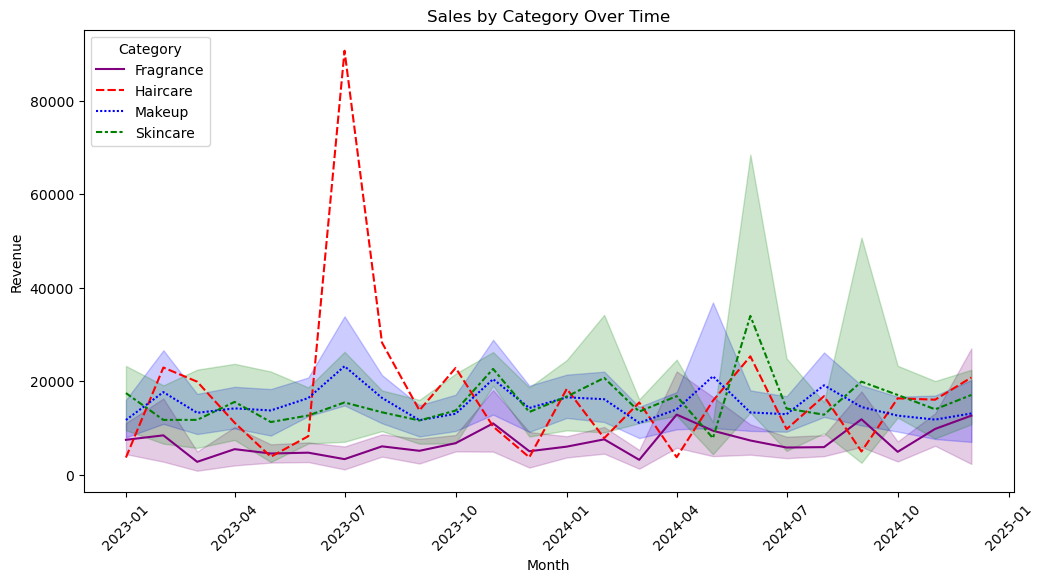

In [32]:
# Plot the Sales by Category over Time by Category
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sales,
    x='month',
    y='revenue',
    hue='category',
    palette=category_colors,
    style='category'
)
plt.title('Sales by Category Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Category', loc='upper left')


plt.show()

/tmp/ipykernel_2956/2134534790.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data=sales.groupby('category')['revenue'].sum().reset_index(),
/tmp/ipykernel_2956/2134534790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


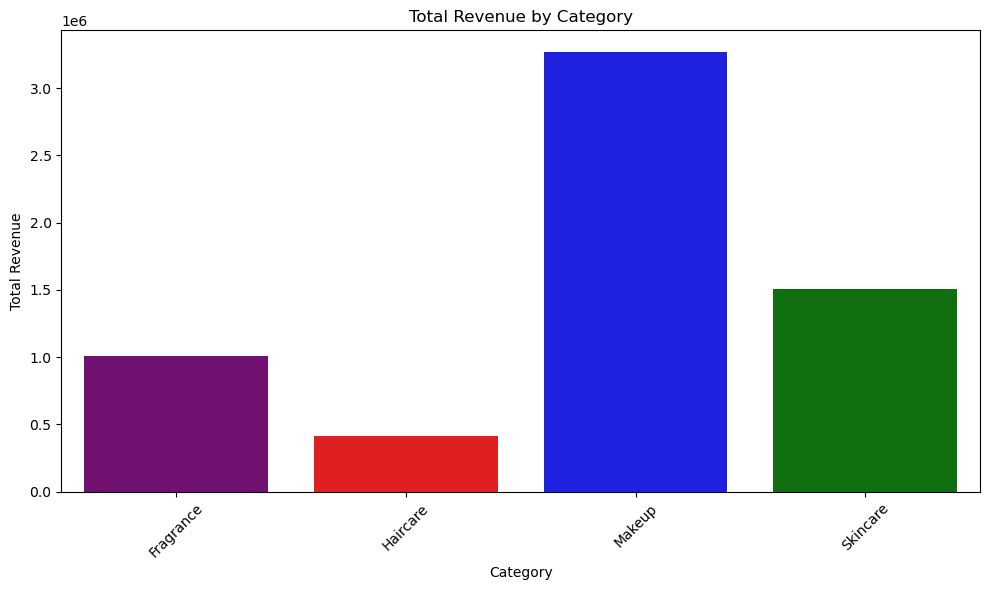

In [29]:
# Plot the Total Revenue by Category
plt.figure(figsize=(10, 6))
sns.barplot(
    data=sales.groupby('category')['revenue'].sum().reset_index(),
    x='category',
    y='revenue',
    palette=category_colors
)
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

In [28]:
sales_by_category = sales.groupby('category').agg({'units_sold': 'sum',
                               'unit_price': 'mean',
                               'revenue': 'sum'
                               })

sales_by_category.sort_values(by='revenue', ascending=False, inplace=True)

sales_by_category  

/tmp/ipykernel_2956/1600356452.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_category = sales.groupby('category').agg({'units_sold': 'sum',


,units_sold,unit_price,revenue
category,,,
Makeup,117316,27.947269,3266143.48
Skincare,53293,27.696042,1503282.15
Fragrance,34710,28.271458,1011344.23
Haircare,14448,28.243333,411226.07


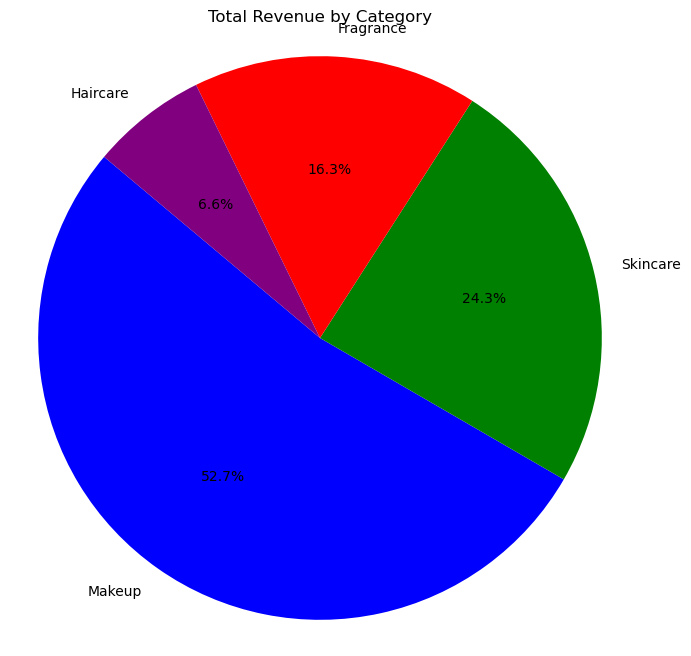

In [33]:
# Plot in a Pie Chart the Total Revenue by Category
plt.figure(figsize=(8, 8))
plt.pie(sales_by_category['revenue'],
        labels=sales_by_category.index,
        autopct='%1.1f%%',
        colors=category_colors.values(),
        startangle=140)
plt.title('Total Revenue by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()  

In [10]:
sales['product_id'].unique()

array(['P1000', 'P1001', 'P1002', 'P1003', 'P1004', 'P1005', 'P1006',
       'P1007', 'P1008', 'P1009', 'P1010', 'P1011', 'P1012', 'P1013',
       'P1014', 'P1015', 'P1016', 'P1017', 'P1018', 'P1019'], dtype=object)

In [18]:
sales_by_product = sales.groupby(by = ['product_id', 'category']).agg({'units_sold': 'sum',
                                                                       'unit_price': 'mean',
                                                                       'revenue': 'sum'})
sales_by_product.dropna(inplace=True)

sales_by_product.sort_values(by='revenue', ascending=False, inplace=True)
sales_by_product

/tmp/ipykernel_2956/2019300439.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_product = sales.groupby(by = ['product_id', 'category']).agg({'units_sold': 'sum',


,,units_sold,unit_price,revenue
product_id,category,,,
P1015,Skincare,13740,28.406250,412900.17
P1009,Haircare,14448,28.243333,411226.07
P1012,Makeup,13733,27.938750,406828.85
P1003,Makeup,14878,28.291667,398989.72
P1008,Makeup,12782,30.830417,392863.77
P1019,Makeup,13779,28.693750,388084.97
P1002,Skincare,13187,28.329583,384009.58
P1007,Skincare,12744,29.067917,376012.32
P1000,Makeup,14179,26.309583,374638.39


In [34]:
# Dist Vizualization and Asimetry (Skewness and Kurtosis)
# Skewness means the asymmetry of the distribution of values in a dataset.
# Kurtosis measures the "tailedness" of the distribution, indicating how much of the data is in the tails compared to a normal distribution.
# A positive skewness indicates a longer tail on the right side of the distribution, while a negative skewness indicates a longer tail on the left side.
# Kurtosis values greater than 3 indicate a distribution with heavier tails than a normal distribution
# (leptokurtic), while values less than 3 indicate lighter tails (platykurtic).
print("Skewness:", sales['revenue'].skew())
print("Kurtosis:", sales['revenue'].kurtosis())

Skewness: 2.77268526245318
Kurtosis: 13.992236091017748


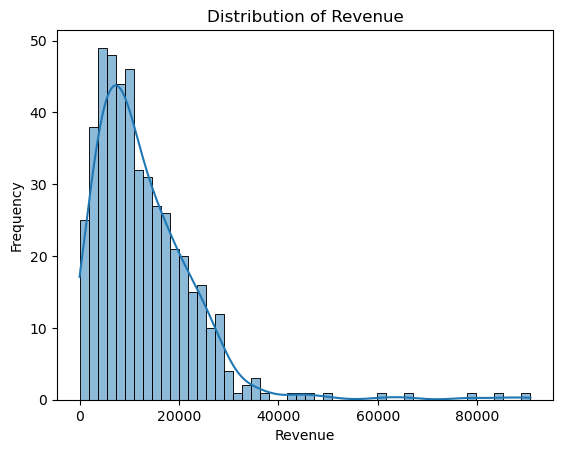

In [35]:
sns.histplot(sales['revenue'], kde=True, bins=50)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()  

/tmp/ipykernel_2956/991539416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='revenue', data=sales, palette=category_colors)


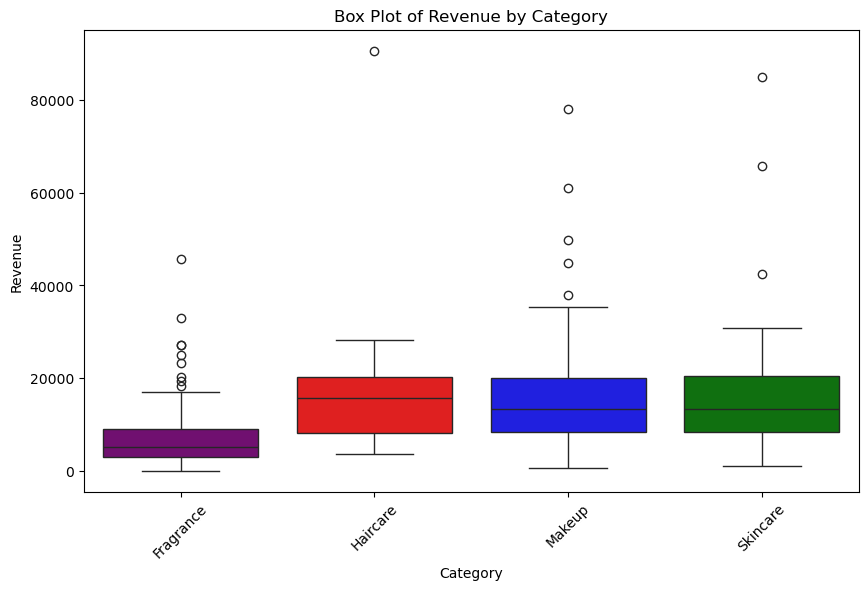

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='revenue', data=sales, palette=category_colors)
plt.title('Box Plot of Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()  

In [38]:
# Outliers Detection with IQR Method
Q1 = sales['revenue'].quantile(0.25)
Q3 = sales['revenue'].quantile(0.75)

#IQR (Interquantile Range)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR    

# Filter out the outliers
outliers = sales[(sales['revenue'] < lower_bound) | (sales['revenue'] > upper_bound)]
print("Number of outliers detected:", len(outliers))        

Number of outliers detected: 12
